In [1]:
import sys
import os
sys.path.insert(0, "../") # uncomment to work with local copy
import diffusive_solver as df
print(df.__version__)

from diffusive_solver import *

3.0rc8


In [2]:
os.system('gmsh -2 geometry_files/1D_example.geo')
geo = Geometry.from_msh_file('geometry_files/1D_example.msh', dim = 1, dim_keep = 2, n_contacts = 2)

In [3]:
geo.check_dimensions()

Total volume = 4.0
Total area = 2.0
Subdomain 3 with volume = 0.0
Contact 1 with area = 1.0
Contact 2 with area = 1.0


In [4]:
L = Matrix_Expression(lambda x: 1-x**2/20, mesh = geo.mesh)

In [5]:
problem = Problem(geometry = geo, L = [[L]], biases = [[0,1]])

In [6]:
problem.solve()

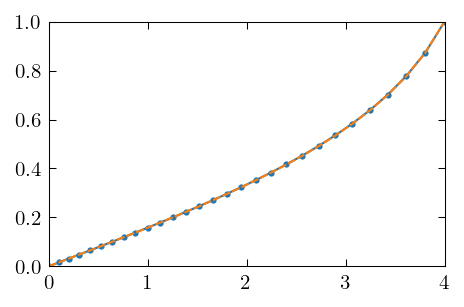

In [7]:
x = np.sort(geo.coordinates[:,0])
plt.plot(x, [problem.fields[0](xi,0) for xi in x],'o-')
plt.plot(x,np.arctanh(x/np.sqrt(20)) /np.arctanh(4/np.sqrt(20)),'--')